In [1]:
#Importing packages
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pd.options.mode.chained_assignment = None  # default='warn'


pd.options.display.max_columns = 70
pd.options.display.max_rows = 99

In [13]:
df = pd.read_excel('advstats.xlsx', sheet_name='AdvancedStatsNC')
df2 = pd.read_excel('advstats.xlsx', sheet_name='AdvancedStatsWC')
df3 = pd.read_excel('advstats.xlsx', sheet_name='Differences_NC-WC')
# df['TmPts%'] = 100*(df['Pts']/793)
# df['MPG'] = df['Min']/df['GP']
# df2['TmPts%'] = 100*(df2['Pts']/709)
# df2['MPG'] = df2['Min']/df2['GP']
# df3['TmPts%'] = df['TmPts%']-df2['TmPts%']
# df3['MPG'] = df['MPG']-df2['MPG']
# df['PPG'] = df['Pts']/df['GP']
# df2['PPG'] = df2['Pts']/df2['GP']
# df3['PPG'] = df['PPG']-df2['PPG']

In [14]:
df['MPG'] = df['Min']/df['GP']

In [15]:
df2['MPG'] = df2['Min']/df2['GP']

In [16]:
df3['MPG'] = df['MPG']-df2['MPG']

In [17]:
df['PPG'] = df['Pts']/df['GP']

In [18]:
df2['PPG'] = df2['Pts'].div(df2['GP'])

In [19]:
df3['PPG'] = df['PPG']-df2['PPG']

In [20]:
df3

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
0,1,BAXTER,HUGH,3,11.633333,23,2.534173,27.013796,0.637424,26.376372,-9,-8,-17.532468,-10.950855,4.375000,-6.459330,-2.500000,2.500000,-27.500000,-6.521739,-16.833333,-11.788971,3,-10.880399,-0.666667,7.792208,37,-2,-6,2.500000,-2,-4,0.000000,0,-2,8.333333,-5,-5,-83.333333,-3,-8,-11,-2,0,-2,1,1,-1.563889,-2.000000
1,24,DIENER,JOHN,-2,-17.816667,-36,-12.820156,5.438402,42.982456,-37.544054,-6,-2,-200.000000,0.198413,-150.000000,-150.000000,0.000000,0.000000,0.000000,0.000000,1.127820,-1.530055,9,0.000000,-1.000000,-33.333333,-10,-2,-1,-100.000000,0,0,0.000000,-2,-1,-100.000000,0,0,0.000000,0,-4,-4,0,-1,0,0,-3,-2.047778,-1.200000
2,11,EVERMAN,SCOTT,2,95.416667,154,-1.467072,-11.664820,-2.257336,-9.407484,62,47,9.679144,4.514628,2.801724,3.736842,21.839080,-21.839080,9.123563,1.612248,2.005623,1.750000,-9,-2.256592,-0.828571,-2.228164,4,24,39,5.172414,20,32,-16.666667,4,7,4.647436,10,12,16.470588,5,8,13,-1,2,5,1,9,5.414167,4.675000
3,3,HADLEY,GABE,2,109.083333,171,-3.553411,-10.980405,8.388632,-19.369037,49,32,29.721921,-0.362534,8.961749,11.034306,-20.218579,20.218579,4.808743,-6.172840,-4.216984,-5.364201,-15,5.219650,1.125000,-9.245215,1,14,31,0.928962,-2,-2,-7.500000,16,33,11.509434,5,5,0.000000,-5,1,-4,9,0,3,-1,7,8.432917,4.050000
4,32,HOWELL,MIKEY,2,100.766667,163,-0.872063,-19.362636,0.031666,-19.394301,36,36,1.573427,2.948985,9.617918,8.348457,11.528327,-11.528327,19.301713,1.380671,-3.064163,-1.336032,-10,-1.490015,-2.233333,7.167832,-41,11,13,9.354414,8,12,3.245436,3,1,15.073529,11,14,4.843305,4,-1,3,5,16,8,2,-4,5.713333,-10.650000
5,14,OSHITA,CHRISTIAN,2,107.850000,171,-1.479111,-13.122956,-2.284786,-10.838170,31,46,-20.200354,0.818301,-14.804762,-13.732736,5.514286,-5.514286,0.619048,-0.828987,-1.093658,-1.225914,-3,-5.317457,-0.333333,-3.371816,-6,11,41,-10.333333,9,23,-11.309524,2,18,-10.912191,7,12,-8.322981,3,7,10,-4,0,2,-2,5,4.644583,11.250000
6,12,PRATT,JUSTIN,-2,-10.400000,-20,-1.291798,-17.965368,49.901186,-67.866554,-10,-3,-121.428571,1.482213,-66.666667,-60.714286,-33.333333,33.333333,-50.000000,0.000000,32.000000,8.055556,7,0.000000,0.000000,0.000000,-13,-4,-2,-58.333333,-3,-3,-30.000000,-1,1,-100.000000,-1,-3,-34.333333,0,0,0,0,0,0,0,1,-0.540278,0.208333
7,33,RAMSEY,TRACE,-3,-15.500000,-33,-10.948946,-1.519757,43.154762,-44.674519,-6,-9,0.000000,-3.529412,21.428571,10.000000,14.285714,-14.285714,-71.428571,14.285714,-8.823529,3.070175,7,22.727273,-0.500000,16.666667,-6,-1,-5,21.428571,-1,-4,16.666667,0,-1,-1.000000,-4,-5,-81.000000,1,-3,-2,-2,-1,-1,0,-5,-24.350694,-17.333333
8,23,RASHEED,KADEN,1,-39.033333,-67,-2.364360,-10.543893,18.141279,-28.685172,-4,-7,21.764706,3.006267,28.571429,25.000000,17.857143,-17.857143,-41.666667,-3.125000,8.385093,1.565389,2,-13.333333,-2.000000,12.352941,-23,-1,-5,15.476190,-2,0,-66.666667,1,-5,52.777778,-3,-5,-61.000000,-2,-3,-5,-6,0,-1,0,-6,-0.361667,-1.400000
9,2,ROBERTS,TYRELL,2,96.033333,158,-0.443361,-12.179803,0.172090,-12.351894,60,39,12.180066,-0.123751,3.223070,6.479247,2.332485,-2.332485,17.620865,-0.265552,3.706902,1.588490,-4,0.954339,-0.097403,-0.301114,-12,13,23,2.120441,5,12,-3.439153,8,11,5.194805,26,25,19.281046,0,13,13,6,3,2,2,3,0.273750,-0.225000


In [21]:
df3

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
0,1,BAXTER,HUGH,3,11.633333,23,2.534173,27.013796,0.637424,26.376372,-9,-8,-17.532468,-10.950855,4.375000,-6.459330,-2.500000,2.500000,-27.500000,-6.521739,-16.833333,-11.788971,3,-10.880399,-0.666667,7.792208,37,-2,-6,2.500000,-2,-4,0.000000,0,-2,8.333333,-5,-5,-83.333333,-3,-8,-11,-2,0,-2,1,1,-1.563889,-2.000000
1,24,DIENER,JOHN,-2,-17.816667,-36,-12.820156,5.438402,42.982456,-37.544054,-6,-2,-200.000000,0.198413,-150.000000,-150.000000,0.000000,0.000000,0.000000,0.000000,1.127820,-1.530055,9,0.000000,-1.000000,-33.333333,-10,-2,-1,-100.000000,0,0,0.000000,-2,-1,-100.000000,0,0,0.000000,0,-4,-4,0,-1,0,0,-3,-2.047778,-1.200000
2,11,EVERMAN,SCOTT,2,95.416667,154,-1.467072,-11.664820,-2.257336,-9.407484,62,47,9.679144,4.514628,2.801724,3.736842,21.839080,-21.839080,9.123563,1.612248,2.005623,1.750000,-9,-2.256592,-0.828571,-2.228164,4,24,39,5.172414,20,32,-16.666667,4,7,4.647436,10,12,16.470588,5,8,13,-1,2,5,1,9,5.414167,4.675000
3,3,HADLEY,GABE,2,109.083333,171,-3.553411,-10.980405,8.388632,-19.369037,49,32,29.721921,-0.362534,8.961749,11.034306,-20.218579,20.218579,4.808743,-6.172840,-4.216984,-5.364201,-15,5.219650,1.125000,-9.245215,1,14,31,0.928962,-2,-2,-7.500000,16,33,11.509434,5,5,0.000000,-5,1,-4,9,0,3,-1,7,8.432917,4.050000
4,32,HOWELL,MIKEY,2,100.766667,163,-0.872063,-19.362636,0.031666,-19.394301,36,36,1.573427,2.948985,9.617918,8.348457,11.528327,-11.528327,19.301713,1.380671,-3.064163,-1.336032,-10,-1.490015,-2.233333,7.167832,-41,11,13,9.354414,8,12,3.245436,3,1,15.073529,11,14,4.843305,4,-1,3,5,16,8,2,-4,5.713333,-10.650000
5,14,OSHITA,CHRISTIAN,2,107.850000,171,-1.479111,-13.122956,-2.284786,-10.838170,31,46,-20.200354,0.818301,-14.804762,-13.732736,5.514286,-5.514286,0.619048,-0.828987,-1.093658,-1.225914,-3,-5.317457,-0.333333,-3.371816,-6,11,41,-10.333333,9,23,-11.309524,2,18,-10.912191,7,12,-8.322981,3,7,10,-4,0,2,-2,5,4.644583,11.250000
6,12,PRATT,JUSTIN,-2,-10.400000,-20,-1.291798,-17.965368,49.901186,-67.866554,-10,-3,-121.428571,1.482213,-66.666667,-60.714286,-33.333333,33.333333,-50.000000,0.000000,32.000000,8.055556,7,0.000000,0.000000,0.000000,-13,-4,-2,-58.333333,-3,-3,-30.000000,-1,1,-100.000000,-1,-3,-34.333333,0,0,0,0,0,0,0,1,-0.540278,0.208333
7,33,RAMSEY,TRACE,-3,-15.500000,-33,-10.948946,-1.519757,43.154762,-44.674519,-6,-9,0.000000,-3.529412,21.428571,10.000000,14.285714,-14.285714,-71.428571,14.285714,-8.823529,3.070175,7,22.727273,-0.500000,16.666667,-6,-1,-5,21.428571,-1,-4,16.666667,0,-1,-1.000000,-4,-5,-81.000000,1,-3,-2,-2,-1,-1,0,-5,-24.350694,-17.333333
8,23,RASHEED,KADEN,1,-39.033333,-67,-2.364360,-10.543893,18.141279,-28.685172,-4,-7,21.764706,3.006267,28.571429,25.000000,17.857143,-17.857143,-41.666667,-3.125000,8.385093,1.565389,2,-13.333333,-2.000000,12.352941,-23,-1,-5,15.476190,-2,0,-66.666667,1,-5,52.777778,-3,-5,-61.000000,-2,-3,-5,-6,0,-1,0,-6,-0.361667,-1.400000
9,2,ROBERTS,TYRELL,2,96.033333,158,-0.443361,-12.179803,0.172090,-12.351894,60,39,12.180066,-0.123751,3.223070,6.479247,2.332485,-2.332485,17.620865,-0.265552,3.706902,1.588490,-4,0.954339,-0.097403,-0.301114,-12,13,23,2.120441,5,12,-3.439153,8,11,5.194805,26,25,19.281046,0,13,13,6,3,2,2,3,0.273750,-0.225000


In [22]:
df4 = df.drop(columns=['GP','NRTG'],index=[1,6,9])
df5 = df3.drop(columns=['NRTG'],index=[1,6])

In [ ]:
df5.plot(x="Last", y=["TO%","Min","TPo%","Pace","ORTG","DRTG","Pts","TS%"], kind="bar",width=.75)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("Differences from GMS with Chris and without")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('1_19_plt2.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=180)

In [ ]:
df5.plot(x="Last", y=["Min","TPE","Pts","TPos","3FR","2FR","FTR"], kind="bar",width=.75)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("Differences from GMS with Chris and without")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('1_19_plt3.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=180)

In [ ]:
df.plot(x="Last", y=["TmPts%","TPE","Pts","TPos"], kind="bar",width=.75)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("Differences from GMS with Chris and without")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('1_19_plt4.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=180)

In [ ]:
df2.plot(x="Last", y=["TmPts%","TPE","Pts","TPos"], kind="bar",width=.75)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("Games from 12-5-19 to 1-18-20")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [ ]:
df3

In [24]:
df3.iloc[df3['Pts'].idxmax()]  # .ix instead of .iloc in older versions of pandas

#              11
Last      EVERMAN
First       SCOTT
GP              2
Min       95.4167
Pos           154
Pace     -1.46707
ORTG     -11.6648
DRTG     -2.25734
NRTG     -9.40748
Pts            62
TPos           47
TPE       9.67914
TPo%      4.51463
eFG%      2.80172
TS%       3.73684
2FR       21.8391
3FR      -21.8391
FTR       9.12356
ORB%      1.61225
DRB%      2.00562
REB%         1.75
ORbD           -9
AST%     -2.25659
ATR     -0.828571
TO%      -2.22816
+/-             4
FGM            24
FGA            39
FG%       5.17241
2FM            20
2FA            32
2F%      -16.6667
3FM             4
3FA             7
3F%       4.64744
FTM            10
FTA            12
FT%       16.4706
ORb             5
DRb             8
Reb            13
Ast            -1
TO              2
Stl             5
Blk             1
PF              9
MPG       5.41417
PPG         4.675
Name: 2, dtype: object

In [25]:
df3.iloc[df3['DRTG'].idxmin()]  # .ix instead of .iloc in older versions of pandas

#                5
Last      SULLIVAN
First        MAREK
GP               2
Min        174.467
Pos            293
Pace    -0.0330233
ORTG      -12.4092
DRTG      -5.07497
NRTG      -7.33421
Pts             48
TPos            52
TPE       -34.8837
TPo%       2.29348
eFG%      -13.9394
TS%       -13.6875
2FR       -7.57576
3FR        7.57576
FTR        18.4848
ORB%      -2.82425
DRB%       11.5745
REB%       4.76072
ORbD           -11
AST%      -5.42929
ATR       -6.22727
TO%        6.90834
+/-             62
FGM             17
FGA             36
FG%       -16.0606
2FM             13
2FA             25
2F%            -18
3FM              4
3FA             11
3F%          11.25
FTM             10
FTA             17
FT%       -33.3333
ORb              4
DRb             48
Reb             52
Ast              8
TO               9
Stl             17
Blk              7
PF               3
MPG         22.291
PPG        16.5571
Name: 10, dtype: object

One thing I noticed quickly after plotting these three previous barchart is that Scott Everman really has stepped up his game on offesnse which really is helping us out during our time without Chris in the lineup. You can see the graph first graph and from the dataframe df3 that the difference in Scott's Pts is the highest of anyone else. This is a good sign that the offensive execution and over all play of the team has not been heavily impacted, and when Chris comes back the overall team should be stronger/more efficient. 


In [26]:
df2.loc[df2['Last'] == 'HANSEN']

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
4,44,HANSEN,CHRIS,8,219.133333,373,68.086401,143.431635,95.956873,47.474762,154,116,132.758621,27.751196,67.525773,71.296296,56.701031,43.298969,24.742268,12.820513,20.792079,17.318436,-15,7.194245,1.25,6.896552,179,56,97,57.731959,37,55,67.272727,19,42,45.238095,23,24,95.833333,20,42,62,10,8,8,6,15,27.391667,19.25


In [27]:
df.loc[df['Last'] == 'EVERMAN']

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
2,11,EVERMAN,SCOTT,10,260.516667,437,67.097435,120.1373,97.742664,22.394636,123,102,120.588235,21.702128,63.218391,64.736842,55.172414,44.827586,19.54023,4.918033,8.294931,6.75,-13,8.088235,1.571429,6.862745,92,48,87,55.172414,34,48,70.833333,14,39,35.897436,13,17,76.470588,9,18,27,11,7,7,3,21,26.051667,12.3


In [28]:
df2.loc[df2['Last'] == 'EVERMAN']

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
2,11,EVERMAN,SCOTT,8,165.1,283,68.564506,131.80212,100.0,31.80212,61,55,110.909091,17.1875,60.416667,61.0,33.333333,66.666667,10.416667,3.305785,6.289308,5.0,-4,10.344828,2.4,9.090909,88,24,48,50.0,14,16,87.5,10,32,31.25,3,5,60.0,4,10,14,12,5,2,2,12,20.6375,7.625


In [29]:
everman_ppp_wc = df2.loc[df2['Last'] == 'EVERMAN']['Pts']/df2.loc[df2['Last'] == 'EVERMAN']['Pos']
everman_ppp_wc

2    0.215548
dtype: float64

In [30]:
everman_ppp_nc = df.loc[df['Last'] == 'EVERMAN']['Pts']/df.loc[df['Last'] == 'EVERMAN']['Pos']
everman_ppp_nc

2    0.281465
dtype: float64

### Let's look at the dataframe "df3" which is a dataframe I created to show the differences in values in "df-df2" or from games without Chris Hansen subtracted by the values of games with Chris in the lineup. 

>- I want to sort this dataframe by "Min" column to show who has had the largest increases in minutes since Chris's absence, after I do that I will have a better idea of what players to look at in order to determine who has done what with the increased minutes. 

In [31]:
df3.sort_values(by='PPG', ascending=False)

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
10,5,SULLIVAN,MAREK,2,174.466667,293,-0.033023,-12.409178,-5.074967,-7.334210,48,52,-34.883721,2.293482,-13.939394,-13.687500,-7.575758,7.575758,18.484848,-2.824250,11.574503,4.760718,-11,-5.429293,-6.227273,6.908345,62,17,36,-16.060606,13,25,-18.000000,4,11,11.250000,10,17,-33.333333,4,48,52,8,9,17,7,3,22.290952,16.557143
5,14,OSHITA,CHRISTIAN,2,107.850000,171,-1.479111,-13.122956,-2.284786,-10.838170,31,46,-20.200354,0.818301,-14.804762,-13.732736,5.514286,-5.514286,0.619048,-0.828987,-1.093658,-1.225914,-3,-5.317457,-0.333333,-3.371816,-6,11,41,-10.333333,9,23,-11.309524,2,18,-10.912191,7,12,-8.322981,3,7,10,-4,0,2,-2,5,4.644583,11.250000
2,11,EVERMAN,SCOTT,2,95.416667,154,-1.467072,-11.664820,-2.257336,-9.407484,62,47,9.679144,4.514628,2.801724,3.736842,21.839080,-21.839080,9.123563,1.612248,2.005623,1.750000,-9,-2.256592,-0.828571,-2.228164,4,24,39,5.172414,20,32,-16.666667,4,7,4.647436,10,12,16.470588,5,8,13,-1,2,5,1,9,5.414167,4.675000
3,3,HADLEY,GABE,2,109.083333,171,-3.553411,-10.980405,8.388632,-19.369037,49,32,29.721921,-0.362534,8.961749,11.034306,-20.218579,20.218579,4.808743,-6.172840,-4.216984,-5.364201,-15,5.219650,1.125000,-9.245215,1,14,31,0.928962,-2,-2,-7.500000,16,33,11.509434,5,5,0.000000,-5,1,-4,9,0,3,-1,7,8.432917,4.050000
6,12,PRATT,JUSTIN,-2,-10.400000,-20,-1.291798,-17.965368,49.901186,-67.866554,-10,-3,-121.428571,1.482213,-66.666667,-60.714286,-33.333333,33.333333,-50.000000,0.000000,32.000000,8.055556,7,0.000000,0.000000,0.000000,-13,-4,-2,-58.333333,-3,-3,-30.000000,-1,1,-100.000000,-1,-3,-34.333333,0,0,0,0,0,0,0,1,-0.540278,0.208333
9,2,ROBERTS,TYRELL,2,96.033333,158,-0.443361,-12.179803,0.172090,-12.351894,60,39,12.180066,-0.123751,3.223070,6.479247,2.332485,-2.332485,17.620865,-0.265552,3.706902,1.588490,-4,0.954339,-0.097403,-0.301114,-12,13,23,2.120441,5,12,-3.439153,8,11,5.194805,26,25,19.281046,0,13,13,6,3,2,2,3,0.273750,-0.225000
1,24,DIENER,JOHN,-2,-17.816667,-36,-12.820156,5.438402,42.982456,-37.544054,-6,-2,-200.000000,0.198413,-150.000000,-150.000000,0.000000,0.000000,0.000000,0.000000,1.127820,-1.530055,9,0.000000,-1.000000,-33.333333,-10,-2,-1,-100.000000,0,0,0.000000,-2,-1,-100.000000,0,0,0.000000,0,-4,-4,0,-1,0,0,-3,-2.047778,-1.200000
8,23,RASHEED,KADEN,1,-39.033333,-67,-2.364360,-10.543893,18.141279,-28.685172,-4,-7,21.764706,3.006267,28.571429,25.000000,17.857143,-17.857143,-41.666667,-3.125000,8.385093,1.565389,2,-13.333333,-2.000000,12.352941,-23,-1,-5,15.476190,-2,0,-66.666667,1,-5,52.777778,-3,-5,-61.000000,-2,-3,-5,-6,0,-1,0,-6,-0.361667,-1.400000
0,1,BAXTER,HUGH,3,11.633333,23,2.534173,27.013796,0.637424,26.376372,-9,-8,-17.532468,-10.950855,4.375000,-6.459330,-2.500000,2.500000,-27.500000,-6.521739,-16.833333,-11.788971,3,-10.880399,-0.666667,7.792208,37,-2,-6,2.500000,-2,-4,0.000000,0,-2,8.333333,-5,-5,-83.333333,-3,-8,-11,-2,0,-2,1,1,-1.563889,-2.000000
11,25,TOMBE,MARTIN,0,-19.733333,-33,0.579884,-30.398936,48.108512,-78.507448,-22,-9,-96.323529,-2.888889,-100.000000,-60.714286,-18.181818,18.181818,120.454545,4.545455,-20.370370,-9.587912,2,1.304348,0.333333,-5.147059,-46,-8,-7,-72.727273,-2,-2,-101.000000,-6,-5,-66.666667,0,1,-11.904762,1,-11,-10,-1,-2,1,0,0,1.142500,-5.975000


>- Okay, so after sorting the df3 we can see that Marek, Gabe, Christian, Mikey, Tyrell, and Scott are the players who are being used the most as either starters or bench/rotation so these players we can group there differences in values into a new dataframe to show what is going on with our team. 

In [32]:
scott_everman = df.loc[df['Last'] == 'EVERMAN'].append(df2.loc[df2['Last'] == 'EVERMAN'],sort=False).append(df3.loc[df3['Last'] == 'EVERMAN'],sort=False)

In [33]:
scott_everman['Last']=['Last 10 Games','First 8 Games','Differences']
scott_everman

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
2,11,Last 10 Games,SCOTT,10,260.516667,437,67.097435,120.13730,97.742664,22.394636,123,102,120.588235,21.702128,63.218391,64.736842,55.172414,44.827586,19.540230,4.918033,8.294931,6.75,-13,8.088235,1.571429,6.862745,92,48,87,55.172414,34,48,70.833333,14,39,35.897436,13,17,76.470588,9,18,27,11,7,7,3,21,26.051667,12.300
2,11,First 8 Games,SCOTT,8,165.100000,283,68.564506,131.80212,100.000000,31.802120,61,55,110.909091,17.187500,60.416667,61.000000,33.333333,66.666667,10.416667,3.305785,6.289308,5.00,-4,10.344828,2.400000,9.090909,88,24,48,50.000000,14,16,87.500000,10,32,31.250000,3,5,60.000000,4,10,14,12,5,2,2,12,20.637500,7.625
2,11,Differences,SCOTT,2,95.416667,154,-1.467072,-11.66482,-2.257336,-9.407484,62,47,9.679144,4.514628,2.801724,3.736842,21.839080,-21.839080,9.123563,1.612248,2.005623,1.75,-9,-2.256592,-0.828571,-2.228164,4,24,39,5.172414,20,32,-16.666667,4,7,4.647436,10,12,16.470588,5,8,13,-1,2,5,1,9,5.414167,4.675


In [34]:
marek_sullivan = df.loc[df['Last'] == 'SULLIVAN'].append(df2.loc[df2['Last'] == 'SULLIVAN'],sort=False).append(df3.loc[df3['Last'] == 'SULLIVAN'],sort=False)
mikey_howell = df.loc[df['Last']=='HOWELL'].append(df2.loc[df2['Last']=='HOWELL'],sort=False).append(df3.loc[df3['Last'] == 'HOWELL'],sort=False)

In [35]:
marek_sullivan

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
11,5,SULLIVAN,MAREK,10,311.300000,523,67.202056,117.590822,93.653846,23.936976,99,86,115.116279,15.221239,64.393939,66.0000,75.757576,24.242424,31.818182,5.829596,26.104418,16.525424,-12,13.888889,2.272727,12.790698,128,40,66,60.606061,35,50,70.0,5,16,31.25,14,21,66.666667,13,65,78,25,11,24,10,17,31.130000,9.900000
12,5,SULLIVAN,MAREK,8,136.833333,230,67.235079,130.000000,98.728814,31.271186,51,34,150.000000,12.927757,78.333333,79.6875,83.333333,16.666667,13.333333,8.653846,14.529915,11.764706,-1,19.318182,8.500000,5.882353,66,23,30,76.666667,22,25,88.0,1,5,20.00,4,4,100.000000,9,17,26,17,2,7,3,14,17.104167,6.375000
10,5,SULLIVAN,MAREK,2,174.466667,293,-0.033023,-12.409178,-5.074967,-7.334210,48,52,-34.883721,2.293482,-13.939394,-13.6875,-7.575758,7.575758,18.484848,-2.824250,11.574503,4.760718,-11,-5.429293,-6.227273,6.908345,62,17,36,-16.060606,13,25,-18.0,4,11,11.25,10,17,-33.333333,4,48,52,8,9,17,7,3,22.290952,16.557143


In [36]:
mikey_howell['Last']=['Last 10 Games','First 8 Games','Differences']

In [38]:
gabe_hadley = df.loc[df['Last'] == 'HADLEY'].append(df2.loc[df2['Last'] == 'HADLEY'],sort=False).append(df3.loc[df3['Last'] == 'HADLEY'],sort=False)

In [65]:
tyrell

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
10,2,Last 10 Games,TYRELL,10,335.933333,562,66.918039,119.750890,96.985816,22.765074,187,162,115.432099,26.557377,58.778626,63.175676,41.221374,58.778626,25.954198,0.809717,11.567164,6.407767,-11,19.075145,2.357143,8.641975,126,61,131,46.564885,29,54,53.703704,32,77,41.558442,33,34,97.058824,2,31,33,33,14,10,2,15,33.593333,18.700
11,2,First 8 Games,TYRELL,8,239.900000,404,67.361401,131.930693,96.813725,35.116968,127,123,103.252033,26.681128,55.555556,56.696429,38.888889,61.111111,8.333333,1.075269,7.860262,4.819277,-7,18.120805,2.454545,8.943089,138,48,108,44.444444,24,42,57.142857,24,66,36.363636,7,9,77.777778,2,18,20,27,11,8,0,12,29.987500,15.875
9,2,Differences,TYRELL,2,96.033333,158,-0.443361,-12.179803,0.172090,-12.351894,60,39,12.180066,-0.123751,3.223070,6.479247,2.332485,-2.332485,17.620865,-0.265552,3.706902,1.588490,-4,0.954339,-0.097403,-0.301114,-12,13,23,2.120441,5,12,-3.439153,8,11,5.194805,26,25,19.281046,0,13,13,6,3,2,2,3,0.273750,-0.225


In [40]:
differences = pd.DataFrame()
differences = differences.append(df3.loc[df3['Last'] == 'HADLEY'],sort=False).append(df3.loc[df3['Last'] == 'EVERMAN'],sort=False).append(df3.loc[df3['Last'] == 'SULLIVAN'],sort=False).append(df3.loc[df3['Last'] == 'ROBERTS'],sort=False).append(df3.loc[df3['Last'] == 'OSHITA'],sort=False).append(df3.loc[df3['Last'] == 'HOWELL'],sort=False)

In [41]:
differences

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
3,3,HADLEY,GABE,2,109.083333,171,-3.553411,-10.980405,8.388632,-19.369037,49,32,29.721921,-0.362534,8.961749,11.034306,-20.218579,20.218579,4.808743,-6.172840,-4.216984,-5.364201,-15,5.219650,1.125000,-9.245215,1,14,31,0.928962,-2,-2,-7.500000,16,33,11.509434,5,5,0.000000,-5,1,-4,9,0,3,-1,7,8.432917,4.050000
2,11,EVERMAN,SCOTT,2,95.416667,154,-1.467072,-11.664820,-2.257336,-9.407484,62,47,9.679144,4.514628,2.801724,3.736842,21.839080,-21.839080,9.123563,1.612248,2.005623,1.750000,-9,-2.256592,-0.828571,-2.228164,4,24,39,5.172414,20,32,-16.666667,4,7,4.647436,10,12,16.470588,5,8,13,-1,2,5,1,9,5.414167,4.675000
10,5,SULLIVAN,MAREK,2,174.466667,293,-0.033023,-12.409178,-5.074967,-7.334210,48,52,-34.883721,2.293482,-13.939394,-13.687500,-7.575758,7.575758,18.484848,-2.824250,11.574503,4.760718,-11,-5.429293,-6.227273,6.908345,62,17,36,-16.060606,13,25,-18.000000,4,11,11.250000,10,17,-33.333333,4,48,52,8,9,17,7,3,22.290952,16.557143
9,2,ROBERTS,TYRELL,2,96.033333,158,-0.443361,-12.179803,0.172090,-12.351894,60,39,12.180066,-0.123751,3.223070,6.479247,2.332485,-2.332485,17.620865,-0.265552,3.706902,1.588490,-4,0.954339,-0.097403,-0.301114,-12,13,23,2.120441,5,12,-3.439153,8,11,5.194805,26,25,19.281046,0,13,13,6,3,2,2,3,0.273750,-0.225000
5,14,OSHITA,CHRISTIAN,2,107.850000,171,-1.479111,-13.122956,-2.284786,-10.838170,31,46,-20.200354,0.818301,-14.804762,-13.732736,5.514286,-5.514286,0.619048,-0.828987,-1.093658,-1.225914,-3,-5.317457,-0.333333,-3.371816,-6,11,41,-10.333333,9,23,-11.309524,2,18,-10.912191,7,12,-8.322981,3,7,10,-4,0,2,-2,5,4.644583,11.250000
4,32,HOWELL,MIKEY,2,100.766667,163,-0.872063,-19.362636,0.031666,-19.394301,36,36,1.573427,2.948985,9.617918,8.348457,11.528327,-11.528327,19.301713,1.380671,-3.064163,-1.336032,-10,-1.490015,-2.233333,7.167832,-41,11,13,9.354414,8,12,3.245436,3,1,15.073529,11,14,4.843305,4,-1,3,5,16,8,2,-4,5.713333,-10.650000


In [44]:
differences.sort_values(by='Pts',ascending=False)

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
2,11,EVERMAN,SCOTT,2,95.416667,154,-1.467072,-11.664820,-2.257336,-9.407484,62,47,9.679144,4.514628,2.801724,3.736842,21.839080,-21.839080,9.123563,1.612248,2.005623,1.750000,-9,-2.256592,-0.828571,-2.228164,4,24,39,5.172414,20,32,-16.666667,4,7,4.647436,10,12,16.470588,5,8,13,-1,2,5,1,9,5.414167,4.675000
9,2,ROBERTS,TYRELL,2,96.033333,158,-0.443361,-12.179803,0.172090,-12.351894,60,39,12.180066,-0.123751,3.223070,6.479247,2.332485,-2.332485,17.620865,-0.265552,3.706902,1.588490,-4,0.954339,-0.097403,-0.301114,-12,13,23,2.120441,5,12,-3.439153,8,11,5.194805,26,25,19.281046,0,13,13,6,3,2,2,3,0.273750,-0.225000
3,3,HADLEY,GABE,2,109.083333,171,-3.553411,-10.980405,8.388632,-19.369037,49,32,29.721921,-0.362534,8.961749,11.034306,-20.218579,20.218579,4.808743,-6.172840,-4.216984,-5.364201,-15,5.219650,1.125000,-9.245215,1,14,31,0.928962,-2,-2,-7.500000,16,33,11.509434,5,5,0.000000,-5,1,-4,9,0,3,-1,7,8.432917,4.050000
10,5,SULLIVAN,MAREK,2,174.466667,293,-0.033023,-12.409178,-5.074967,-7.334210,48,52,-34.883721,2.293482,-13.939394,-13.687500,-7.575758,7.575758,18.484848,-2.824250,11.574503,4.760718,-11,-5.429293,-6.227273,6.908345,62,17,36,-16.060606,13,25,-18.000000,4,11,11.250000,10,17,-33.333333,4,48,52,8,9,17,7,3,22.290952,16.557143
4,32,HOWELL,MIKEY,2,100.766667,163,-0.872063,-19.362636,0.031666,-19.394301,36,36,1.573427,2.948985,9.617918,8.348457,11.528327,-11.528327,19.301713,1.380671,-3.064163,-1.336032,-10,-1.490015,-2.233333,7.167832,-41,11,13,9.354414,8,12,3.245436,3,1,15.073529,11,14,4.843305,4,-1,3,5,16,8,2,-4,5.713333,-10.650000
5,14,OSHITA,CHRISTIAN,2,107.850000,171,-1.479111,-13.122956,-2.284786,-10.838170,31,46,-20.200354,0.818301,-14.804762,-13.732736,5.514286,-5.514286,0.619048,-0.828987,-1.093658,-1.225914,-3,-5.317457,-0.333333,-3.371816,-6,11,41,-10.333333,9,23,-11.309524,2,18,-10.912191,7,12,-8.322981,3,7,10,-4,0,2,-2,5,4.644583,11.250000


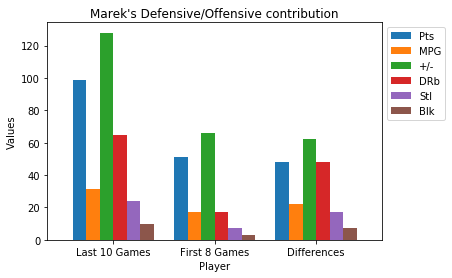

In [82]:
mk.plot(x='Last', y=["Pts","MPG","+/-","DRb","Stl","Blk"], kind="bar",width=.8,log=False)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("Marek's Defensive/Offensive contribution"),plt.xticks(rotation=0)

lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('marekk.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=180)

In [48]:
marek_sullivan['Last']=['Last 10 Games','First 8 Games','Differences']
mk =marek_sullivan
mk

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
11,5,Last 10 Games,MAREK,10,311.300000,523,67.202056,117.590822,93.653846,23.936976,99,86,115.116279,15.221239,64.393939,66.0000,75.757576,24.242424,31.818182,5.829596,26.104418,16.525424,-12,13.888889,2.272727,12.790698,128,40,66,60.606061,35,50,70.0,5,16,31.25,14,21,66.666667,13,65,78,25,11,24,10,17,31.130000,9.900000
12,5,First 8 Games,MAREK,8,136.833333,230,67.235079,130.000000,98.728814,31.271186,51,34,150.000000,12.927757,78.333333,79.6875,83.333333,16.666667,13.333333,8.653846,14.529915,11.764706,-1,19.318182,8.500000,5.882353,66,23,30,76.666667,22,25,88.0,1,5,20.00,4,4,100.000000,9,17,26,17,2,7,3,14,17.104167,6.375000
10,5,Differences,MAREK,2,174.466667,293,-0.033023,-12.409178,-5.074967,-7.334210,48,52,-34.883721,2.293482,-13.939394,-13.6875,-7.575758,7.575758,18.484848,-2.824250,11.574503,4.760718,-11,-5.429293,-6.227273,6.908345,62,17,36,-16.060606,13,25,-18.0,4,11,11.25,10,17,-33.333333,4,48,52,8,9,17,7,3,22.290952,16.557143


In [50]:
differences.sort_values(by='Reb',ascending=False)

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
10,5,SULLIVAN,MAREK,2,174.466667,293,-0.033023,-12.409178,-5.074967,-7.334210,48,52,-34.883721,2.293482,-13.939394,-13.687500,-7.575758,7.575758,18.484848,-2.824250,11.574503,4.760718,-11,-5.429293,-6.227273,6.908345,62,17,36,-16.060606,13,25,-18.000000,4,11,11.250000,10,17,-33.333333,4,48,52,8,9,17,7,3,22.290952,16.557143
2,11,EVERMAN,SCOTT,2,95.416667,154,-1.467072,-11.664820,-2.257336,-9.407484,62,47,9.679144,4.514628,2.801724,3.736842,21.839080,-21.839080,9.123563,1.612248,2.005623,1.750000,-9,-2.256592,-0.828571,-2.228164,4,24,39,5.172414,20,32,-16.666667,4,7,4.647436,10,12,16.470588,5,8,13,-1,2,5,1,9,5.414167,4.675000
9,2,ROBERTS,TYRELL,2,96.033333,158,-0.443361,-12.179803,0.172090,-12.351894,60,39,12.180066,-0.123751,3.223070,6.479247,2.332485,-2.332485,17.620865,-0.265552,3.706902,1.588490,-4,0.954339,-0.097403,-0.301114,-12,13,23,2.120441,5,12,-3.439153,8,11,5.194805,26,25,19.281046,0,13,13,6,3,2,2,3,0.273750,-0.225000
5,14,OSHITA,CHRISTIAN,2,107.850000,171,-1.479111,-13.122956,-2.284786,-10.838170,31,46,-20.200354,0.818301,-14.804762,-13.732736,5.514286,-5.514286,0.619048,-0.828987,-1.093658,-1.225914,-3,-5.317457,-0.333333,-3.371816,-6,11,41,-10.333333,9,23,-11.309524,2,18,-10.912191,7,12,-8.322981,3,7,10,-4,0,2,-2,5,4.644583,11.250000
4,32,HOWELL,MIKEY,2,100.766667,163,-0.872063,-19.362636,0.031666,-19.394301,36,36,1.573427,2.948985,9.617918,8.348457,11.528327,-11.528327,19.301713,1.380671,-3.064163,-1.336032,-10,-1.490015,-2.233333,7.167832,-41,11,13,9.354414,8,12,3.245436,3,1,15.073529,11,14,4.843305,4,-1,3,5,16,8,2,-4,5.713333,-10.650000
3,3,HADLEY,GABE,2,109.083333,171,-3.553411,-10.980405,8.388632,-19.369037,49,32,29.721921,-0.362534,8.961749,11.034306,-20.218579,20.218579,4.808743,-6.172840,-4.216984,-5.364201,-15,5.219650,1.125000,-9.245215,1,14,31,0.928962,-2,-2,-7.500000,16,33,11.509434,5,5,0.000000,-5,1,-4,9,0,3,-1,7,8.432917,4.050000


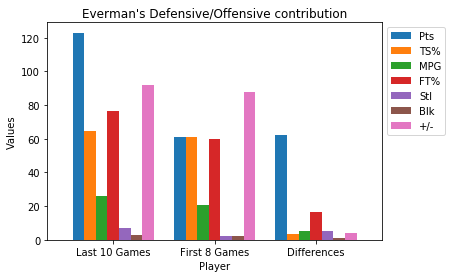

In [81]:
scott_everman.plot(x='Last', y=["Pts","TS%","MPG","FT%","Stl","Blk","+/-"], kind="bar",width=.8,log=False)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("Everman's Defensive/Offensive contribution"),plt.xticks(rotation=0)

lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('Everman.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=180)

In [67]:
tyrell = df.loc[df['Last'] == 'ROBERTS'].append(df2.loc[df2['Last'] == 'ROBERTS'],sort=False).append(df3.loc[df3['Last'] == 'ROBERTS'],sort=False)
tyrell['Last']=['Last 10 Games','First 8 Games','Differences']


,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
10,2,Last 10 Games,TYRELL,10,335.933333,562,66.918039,119.750890,96.985816,22.765074,187,162,115.432099,26.557377,58.778626,63.175676,41.221374,58.778626,25.954198,0.809717,11.567164,6.407767,-11,19.075145,2.357143,8.641975,126,61,131,46.564885,29,54,53.703704,32,77,41.558442,33,34,97.058824,2,31,33,33,14,10,2,15,33.593333,18.700
11,2,First 8 Games,TYRELL,8,239.900000,404,67.361401,131.930693,96.813725,35.116968,127,123,103.252033,26.681128,55.555556,56.696429,38.888889,61.111111,8.333333,1.075269,7.860262,4.819277,-7,18.120805,2.454545,8.943089,138,48,108,44.444444,24,42,57.142857,24,66,36.363636,7,9,77.777778,2,18,20,27,11,8,0,12,29.987500,15.875
9,2,Differences,TYRELL,2,96.033333,158,-0.443361,-12.179803,0.172090,-12.351894,60,39,12.180066,-0.123751,3.223070,6.479247,2.332485,-2.332485,17.620865,-0.265552,3.706902,1.588490,-4,0.954339,-0.097403,-0.301114,-12,13,23,2.120441,5,12,-3.439153,8,11,5.194805,26,25,19.281046,0,13,13,6,3,2,2,3,0.273750,-0.225


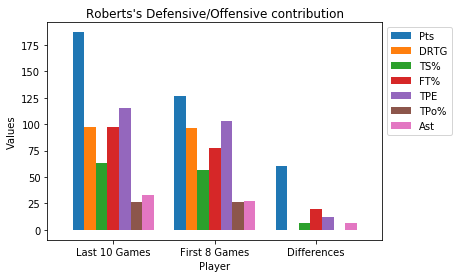

In [97]:
tyrell.plot(x='Last', y=["Pts","DRTG","TS%","FT%","TPE","TPo%","Ast"], kind="bar",width=.8,log=False)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("Roberts's Defensive/Offensive contribution"),plt.xticks(rotation=0)

lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('Roberts.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=180)

In [72]:
gabe_hadley['Last']=['Last 10 Games','First 8 Games','Differences']
gabe_hadley

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
3,3,Last 10 Games,GABE,10,208.100000,343,65.929841,122.740525,97.959184,24.781341,83,71,116.901408,19.137466,62.295082,65.873016,13.114754,86.885246,11.475410,0.00000,7.361963,3.726708,-9,12.068966,1.750,11.267606,85,27,61,44.262295,5,8,62.5,22,53,41.509434,7,7,100.0,0,12,12,14,8,5,0,15,20.810000,8.30
3,3,First 8 Games,GABE,8,99.016667,172,69.483252,133.720930,89.570552,44.150378,34,39,87.179487,19.500000,53.333333,54.838710,33.333333,66.666667,6.666667,6.17284,11.578947,9.090909,6,6.849315,0.625,20.512821,84,13,30,43.333333,7,10,70.0,6,20,30.000000,2,2,100.0,5,11,16,5,8,2,1,8,12.377083,4.25
3,3,Differences,GABE,2,109.083333,171,-3.553411,-10.980405,8.388632,-19.369037,49,32,29.721921,-0.362534,8.961749,11.034306,-20.218579,20.218579,4.808743,-6.17284,-4.216984,-5.364201,-15,5.219650,1.125,-9.245215,1,14,31,0.928962,-2,-2,-7.5,16,33,11.509434,5,5,0.0,-5,1,-4,9,0,3,-1,7,8.432917,4.05


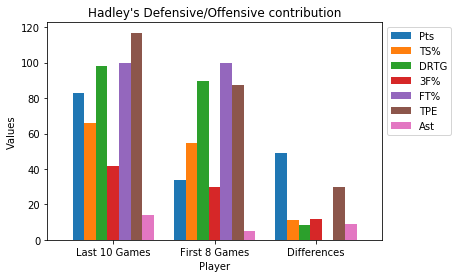

In [92]:
gabe_hadley.plot(x='Last', y=["Pts","TS%","DRTG","3F%","FT%","TPE","Ast"], kind="bar",width=.8,log=False)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("Hadley's Defensive/Offensive contribution"),plt.xticks(rotation=0)

lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('Hadley.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=180)

In [37]:
mikey_howell

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
4,32,Last 10 Games,MIKEY,10,331.050000,552,66.696874,122.282609,98.729583,23.553026,86,88,97.727273,14.740369,71.739130,74.137931,63.043478,36.956522,58.695652,2.564103,11.153846,7.085020,-17,32.380952,2.266667,34.090909,131,28,46,60.869565,18,29,62.068966,10,17,58.823529,20,27,74.074074,6,29,35,68,30,18,3,16,33.105000,8.60
5,32,First 8 Games,MIKEY,8,230.283333,389,67.568937,141.645244,98.697917,42.947328,50,52,96.153846,11.791383,62.121212,65.789474,51.515152,48.484848,39.393939,1.183432,14.218009,8.421053,-7,33.870968,4.500000,26.923077,172,17,33,51.515152,10,17,58.823529,7,16,43.750000,9,13,69.230769,2,30,32,63,14,10,1,20,28.785417,6.25
4,32,Differences,MIKEY,2,100.766667,163,-0.872063,-19.362636,0.031666,-19.394301,36,36,1.573427,2.948985,9.617918,8.348457,11.528327,-11.528327,19.301713,1.380671,-3.064163,-1.336032,-10,-1.490015,-2.233333,7.167832,-41,11,13,9.354414,8,12,3.245436,3,1,15.073529,11,14,4.843305,4,-1,3,5,16,8,2,-4,5.713333,-10.65


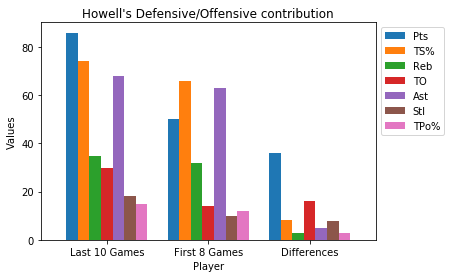

In [89]:
mikey_howell.plot(x='Last', y=["Pts","TS%","Reb",'TO','Ast','Stl',"TPo%",], kind="bar",width=.8,log=False)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("Howell's Defensive/Offensive contribution"),plt.xticks(rotation=0)

lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('Howell.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=180)

In [90]:
christian = df.loc[df['Last'] == 'OSHITA'].append(df2.loc[df2['Last'] == 'OSHITA'],sort=False).append(df3.loc[df3['Last'] == 'OSHITA'],sort=False)
christian['Last']=['Last 10 Games','First 8 Games','Differences']
christian

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG
5,14,Last 10 Games,CHRISTIAN,10,334.30,556,66.527071,119.604317,96.402878,23.201439,175,153,114.379085,25.247525,59.600000,62.056738,44.800000,55.200000,28.000000,6.557377,17.175573,12.055336,-10,7.821229,1.166667,7.843137,129,60,125,48.000000,31,56,55.357143,29,69,42.028986,26,35,74.285714,16,45,61,14,12,7,0,26,33.430000,17.50
7,14,First 8 Games,CHRISTIAN,8,226.45,385,68.006182,132.727273,98.687664,34.039609,144,107,134.579439,24.429224,74.404762,75.789474,39.285714,60.714286,27.380952,7.386364,18.269231,13.281250,-7,13.138686,1.500000,11.214953,135,49,84,58.333333,22,33,66.666667,27,51,52.941176,19,23,82.608696,13,38,51,18,12,5,2,21,28.306250,18.00
5,14,Differences,CHRISTIAN,2,107.85,171,-1.479111,-13.122956,-2.284786,-10.838170,31,46,-20.200354,0.818301,-14.804762,-13.732736,5.514286,-5.514286,0.619048,-0.828987,-1.093658,-1.225914,-3,-5.317457,-0.333333,-3.371816,-6,11,41,-10.333333,9,23,-11.309524,2,18,-10.912191,7,12,-8.322981,3,7,10,-4,0,2,-2,5,4.644583,11.25


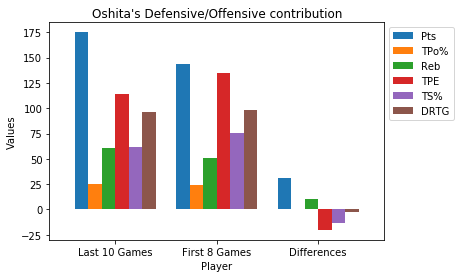

In [91]:
christian.plot(x='Last', y=["Pts","TPo%","Reb",'TPE','TS%','DRTG',], kind="bar",width=.8,log=False)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("Oshita's Defensive/Offensive contribution"),plt.xticks(rotation=0)

lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('Oshita.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=180)

>- Scott Everman: Looking at the data from the games before Chico St. and then the games since Chico St., Scott has been stepping up his game on the defensive end by increasing his rebounding, steals, blocks, decreasing his turnover% and overall just been executing very well with his increased role. On offense Scott has been getting rebounds, getting to the free throw line and making 76%, has a TS% of 64%, and increased his points per game. He has really filled a gap in offense with Chris out and Scott playing a very similar role. 
>
>
>
>
>
>- Marek Sullivan: I noticed Marek has focused in on his defense and court awareness because his defensive efficieny
has actually gone down the most and this is a good thing because have a lower DRTG means you are allowing less pts on the board per possession adjusted by multiplying the value by 100 “possessions”. For example a player A with DRTG = 98, is saying that ver 100 possessions player A is only allowing 98 points to the opposition or "0.98 PPP". Marek has not been impacting the game a lot on offense in fact, his offensive ratings have gone down since Chris’s injury, but he is making up for it playing defense and off ball movement/spacing. Taking into consideration that Marek has also seen the largest increase in: minutes, possesions, box score +/-, defensive rebounds, steals, and points per game I think he has really made a huge positive impact in overall team play. 
>
>
>
>
>
>- Tyrell Roberts: Well what can't I say about Tyrell and his contributions to the team, he is one of our main pillars on the floor executing offense and defense. He is dangerous in the "horns" set on offense roam the permiter and looking for open space to either, shoot, make a good pass, or get to the hoop and draw the defense. He is great at defending the 1 and 2 positions against any opponenent with a great overall defensive effeciency with realtively low personal fouls and grabbing more defensive boards than the first 8 games by 13. But he is just an engine on offesnse and has increased in almost every metric like TS%, Ast, Pts, PPG, Points per scoring possesion TPE, and shooting almost 98% from the free throw line! He has gone down in the box score +/- but it is negligable when you see that his +/- is +126.
>
>
>
>
>
>- Gabe Hadley: Gabe has been a great role player and really can shoot the three ball while defending on the other end. He is what I consider a 3 and D wing player who can play/guard the 1-3 maybe even some 4's position. He is shooting over 40% from three point land, high TS%, steals the ball or forces turnovers, makes his free throws, rebounds well, makes assits, and is very efficient in most the important areas on both offense and defense.
>
>
>
>
>
>
>- Mikey Howell: Mikey has some mixed results but overall been playing very well and is still our number one assist man, but he has seen a noticable drop in his offensive efficiency due to his increase in turnover% but remember he is in control of the ball more as a point guard than before therefore, he has a higher usage rate in the offense now and it makes sense to see a decline in his TO% and ATR due to many factors. I did notice he has maintained his strong defesnse and like most our team can switch on defense to any position. Mikey has quick hands and keeps them active which leads to many forced turnovers on defense which is a huge plus of Mikey along with his rebounding effort. Mikey has really stepped up his offensive efficieny shooting lights out TS% of 74%, he gets to rim and makes easy layups, hits the open man with great passes often, shooting 58% from 3, 74% at the line, and really has been vital in the teams performances. 
>
>
>
>
>
>
>- Christian Oshita: Christian Oshita has the hot hand every night it seems like and he has been the other main piece of offense since Chris has been out along with Tyrell, boasting a usage rate of 25% (this means 25% of our offense flows through him). He is great in so many aspects of the game that he really helps us on both sides. He has a strong defesnive rating, gets rebounds on both ends of the floor like a machine, scores from any where on the floor as well. He has been turning over the ball less and making the most out of each scoring possesion, but he is integral to the team's success. He has dropped in his shooting percentages from 2's,3's,and the free throw line, which, is one we need him to make more efficently.  I just never knew he grabbed so many boards! That is huge especially since I was curious how we are still close in rebounding numbers from when we had Chris. 
>
>
>
>
>
>
>
>
>
>Although, the overall team's offensive/deffensive efficieny ratings has gone down since Chris's injury I believe they have done a great job running the offense and defensive gameplans. The drop in statistics/metrics is actually fairly neglibilbe with the largest drops mostly being in the offensive side due to not having Chris, the team has actually done a great job overall on the defensive metrics to keep us from giving up easy points to the opposition. 

In [ ]:
differences.to_csv('differences_starters.csv')